In [4]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("employee-attrition").getOrCreate()

# csv 파일 로드
df = spark.read.csv('../learning_spark_data/WA_Fn-UseC_-HR-Employee-Attrition.csv', header=True, inferSchema=True)
df.printSchema()

root
 |-- Age: integer (nullable = true)
 |-- Attrition: string (nullable = true)
 |-- BusinessTravel: string (nullable = true)
 |-- DailyRate: integer (nullable = true)
 |-- Department: string (nullable = true)
 |-- DistanceFromHome: integer (nullable = true)
 |-- Education: integer (nullable = true)
 |-- EducationField: string (nullable = true)
 |-- EmployeeCount: integer (nullable = true)
 |-- EmployeeNumber: integer (nullable = true)
 |-- EnvironmentSatisfaction: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- HourlyRate: integer (nullable = true)
 |-- JobInvolvement: integer (nullable = true)
 |-- JobLevel: integer (nullable = true)
 |-- JobRole: string (nullable = true)
 |-- JobSatisfaction: integer (nullable = true)
 |-- MaritalStatus: string (nullable = true)
 |-- MonthlyIncome: integer (nullable = true)
 |-- MonthlyRate: integer (nullable = true)
 |-- NumCompaniesWorked: integer (nullable = true)
 |-- Over18: string (nullable = true)
 |-- OverTime: string 

In [5]:
drop_cols = ['EmployeeNumber', 'EmployeeCount', 'Over18', 'StandardHours']
hr_df = df.drop(*drop_cols)

In [6]:
hr_df.printSchema()

root
 |-- Age: integer (nullable = true)
 |-- Attrition: string (nullable = true)
 |-- BusinessTravel: string (nullable = true)
 |-- DailyRate: integer (nullable = true)
 |-- Department: string (nullable = true)
 |-- DistanceFromHome: integer (nullable = true)
 |-- Education: integer (nullable = true)
 |-- EducationField: string (nullable = true)
 |-- EnvironmentSatisfaction: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- HourlyRate: integer (nullable = true)
 |-- JobInvolvement: integer (nullable = true)
 |-- JobLevel: integer (nullable = true)
 |-- JobRole: string (nullable = true)
 |-- JobSatisfaction: integer (nullable = true)
 |-- MaritalStatus: string (nullable = true)
 |-- MonthlyIncome: integer (nullable = true)
 |-- MonthlyRate: integer (nullable = true)
 |-- NumCompaniesWorked: integer (nullable = true)
 |-- OverTime: string (nullable = true)
 |-- PercentSalaryHike: integer (nullable = true)
 |-- PerformanceRating: integer (nullable = true)
 |-- Relation

In [44]:
# 결측치 확인
from pyspark.sql.functions import col, sum
hr_df.select([sum(col(c).isNull().cast("int")).alias(c) for c in hr_df.columns]).show()

+---+---------+--------------+---------+----------+----------------+---------+--------------+-----------------------+------+----------+--------------+--------+-------+---------------+-------------+-------------+-----------+------------------+--------+-----------------+-----------------+------------------------+----------------+-----------------+---------------------+---------------+--------------+------------------+-----------------------+--------------------+
|Age|Attrition|BusinessTravel|DailyRate|Department|DistanceFromHome|Education|EducationField|EnvironmentSatisfaction|Gender|HourlyRate|JobInvolvement|JobLevel|JobRole|JobSatisfaction|MaritalStatus|MonthlyIncome|MonthlyRate|NumCompaniesWorked|OverTime|PercentSalaryHike|PerformanceRating|RelationshipSatisfaction|StockOptionLevel|TotalWorkingYears|TrainingTimesLastYear|WorkLifeBalance|YearsAtCompany|YearsInCurrentRole|YearsSinceLastPromotion|YearsWithCurrManager|
+---+---------+--------------+---------+----------+----------------+--

In [8]:
hr_df.groupBy('Attrition').count().show()

+---------+-----+
|Attrition|count|
+---------+-----+
|       No| 1233|
|      Yes|  237|
+---------+-----+



In [9]:
pandas_df = hr_df.toPandas()

In [10]:
pandas_df.describe()
pandas_df['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

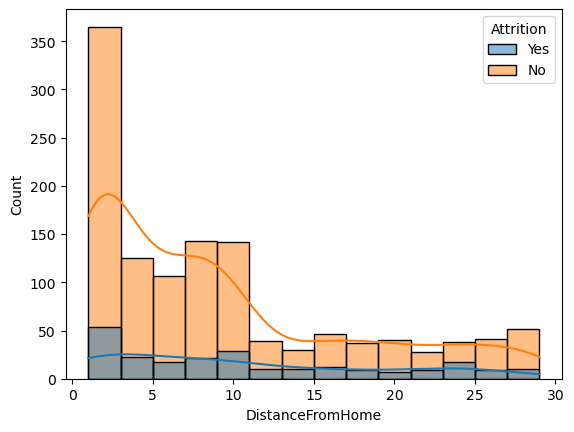

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# 집과 회사 간 거리에 따른 퇴사 여부 시각화
sns.histplot(data=pandas_df, x='DistanceFromHome', hue='Attrition', kde=True )
plt.show()

In [ ]:
# 대부분 10km 이내에 거주중
# 집이랑 회사의 거리가 멀다고 퇴사하는 사람이 많지는 않음

<Axes: xlabel='HourlyRate', ylabel='Count'>

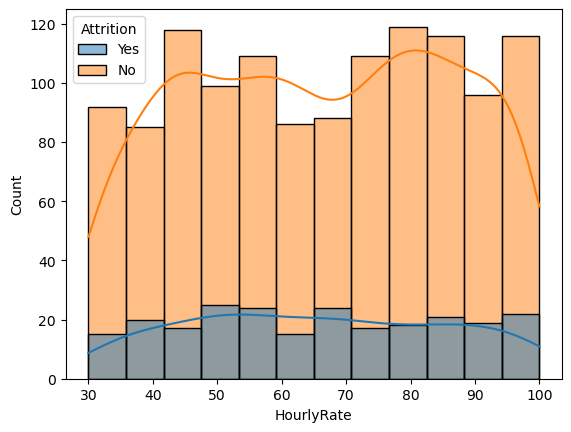

In [17]:
# 시간당 급여
sns.histplot(data=pandas_df, x='HourlyRate', hue='Attrition', kde=True)

<Axes: xlabel='MonthlyIncome', ylabel='Count'>

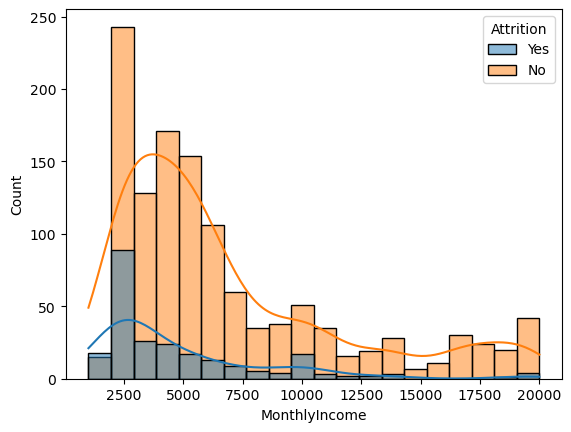

In [18]:
# 월급
sns.histplot(data=pandas_df, x='MonthlyIncome', hue='Attrition', kde=True)

<Axes: xlabel='TotalWorkingYears', ylabel='Count'>

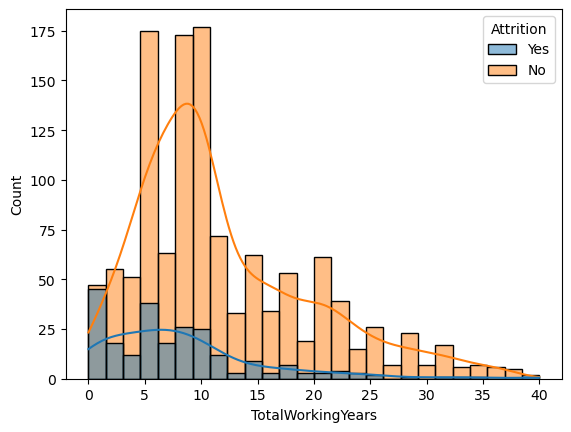

In [19]:
# TotalWorkingYears
sns.histplot(data=pandas_df, x='TotalWorkingYears', hue='Attrition', kde=True)

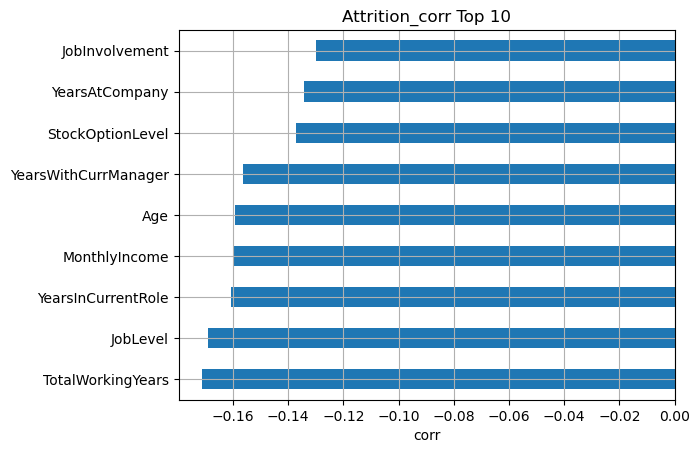

In [28]:
# Attrition을 수치형으로 변환
pandas_df['Attrition_num'] = pandas_df['Attrition'].map({'No': 0, 'Yes': 1})

# 수치형 변수와 Attrition과의 상관관계 추출
target_corr = pandas_df.corr(numeric_only=True)['Attrition_num'].sort_values(key=abs, ascending=False)

# 상위 변수만 시각화
target_corr[1:10].plot(kind='barh', title='Attrition_corr Top 10')
plt.xlabel('corr')
plt.grid()
plt.show()

In [31]:
# Attrition와 상관관계 높은 변수 추출
# 타겟 인코딩
pandas_df['Attrition_num'] = pandas_df['Attrition'].map({'No': 0, 'Yes': 1})

# 상관관계 정렬
target_corr = pandas_df.corr(numeric_only=True)['Attrition_num'].sort_values(key=abs, ascending=False)
print(target_corr)

Attrition_num               1.000000
TotalWorkingYears          -0.171063
JobLevel                   -0.169105
YearsInCurrentRole         -0.160545
MonthlyIncome              -0.159840
Age                        -0.159205
YearsWithCurrManager       -0.156199
StockOptionLevel           -0.137145
YearsAtCompany             -0.134392
JobInvolvement             -0.130016
JobSatisfaction            -0.103481
EnvironmentSatisfaction    -0.103369
DistanceFromHome            0.077924
WorkLifeBalance            -0.063939
TrainingTimesLastYear      -0.059478
DailyRate                  -0.056652
RelationshipSatisfaction   -0.045872
NumCompaniesWorked          0.043494
YearsSinceLastPromotion    -0.033019
Education                  -0.031373
MonthlyRate                 0.015170
PercentSalaryHike          -0.013478
HourlyRate                 -0.006846
PerformanceRating           0.002889
Name: Attrition_num, dtype: float64


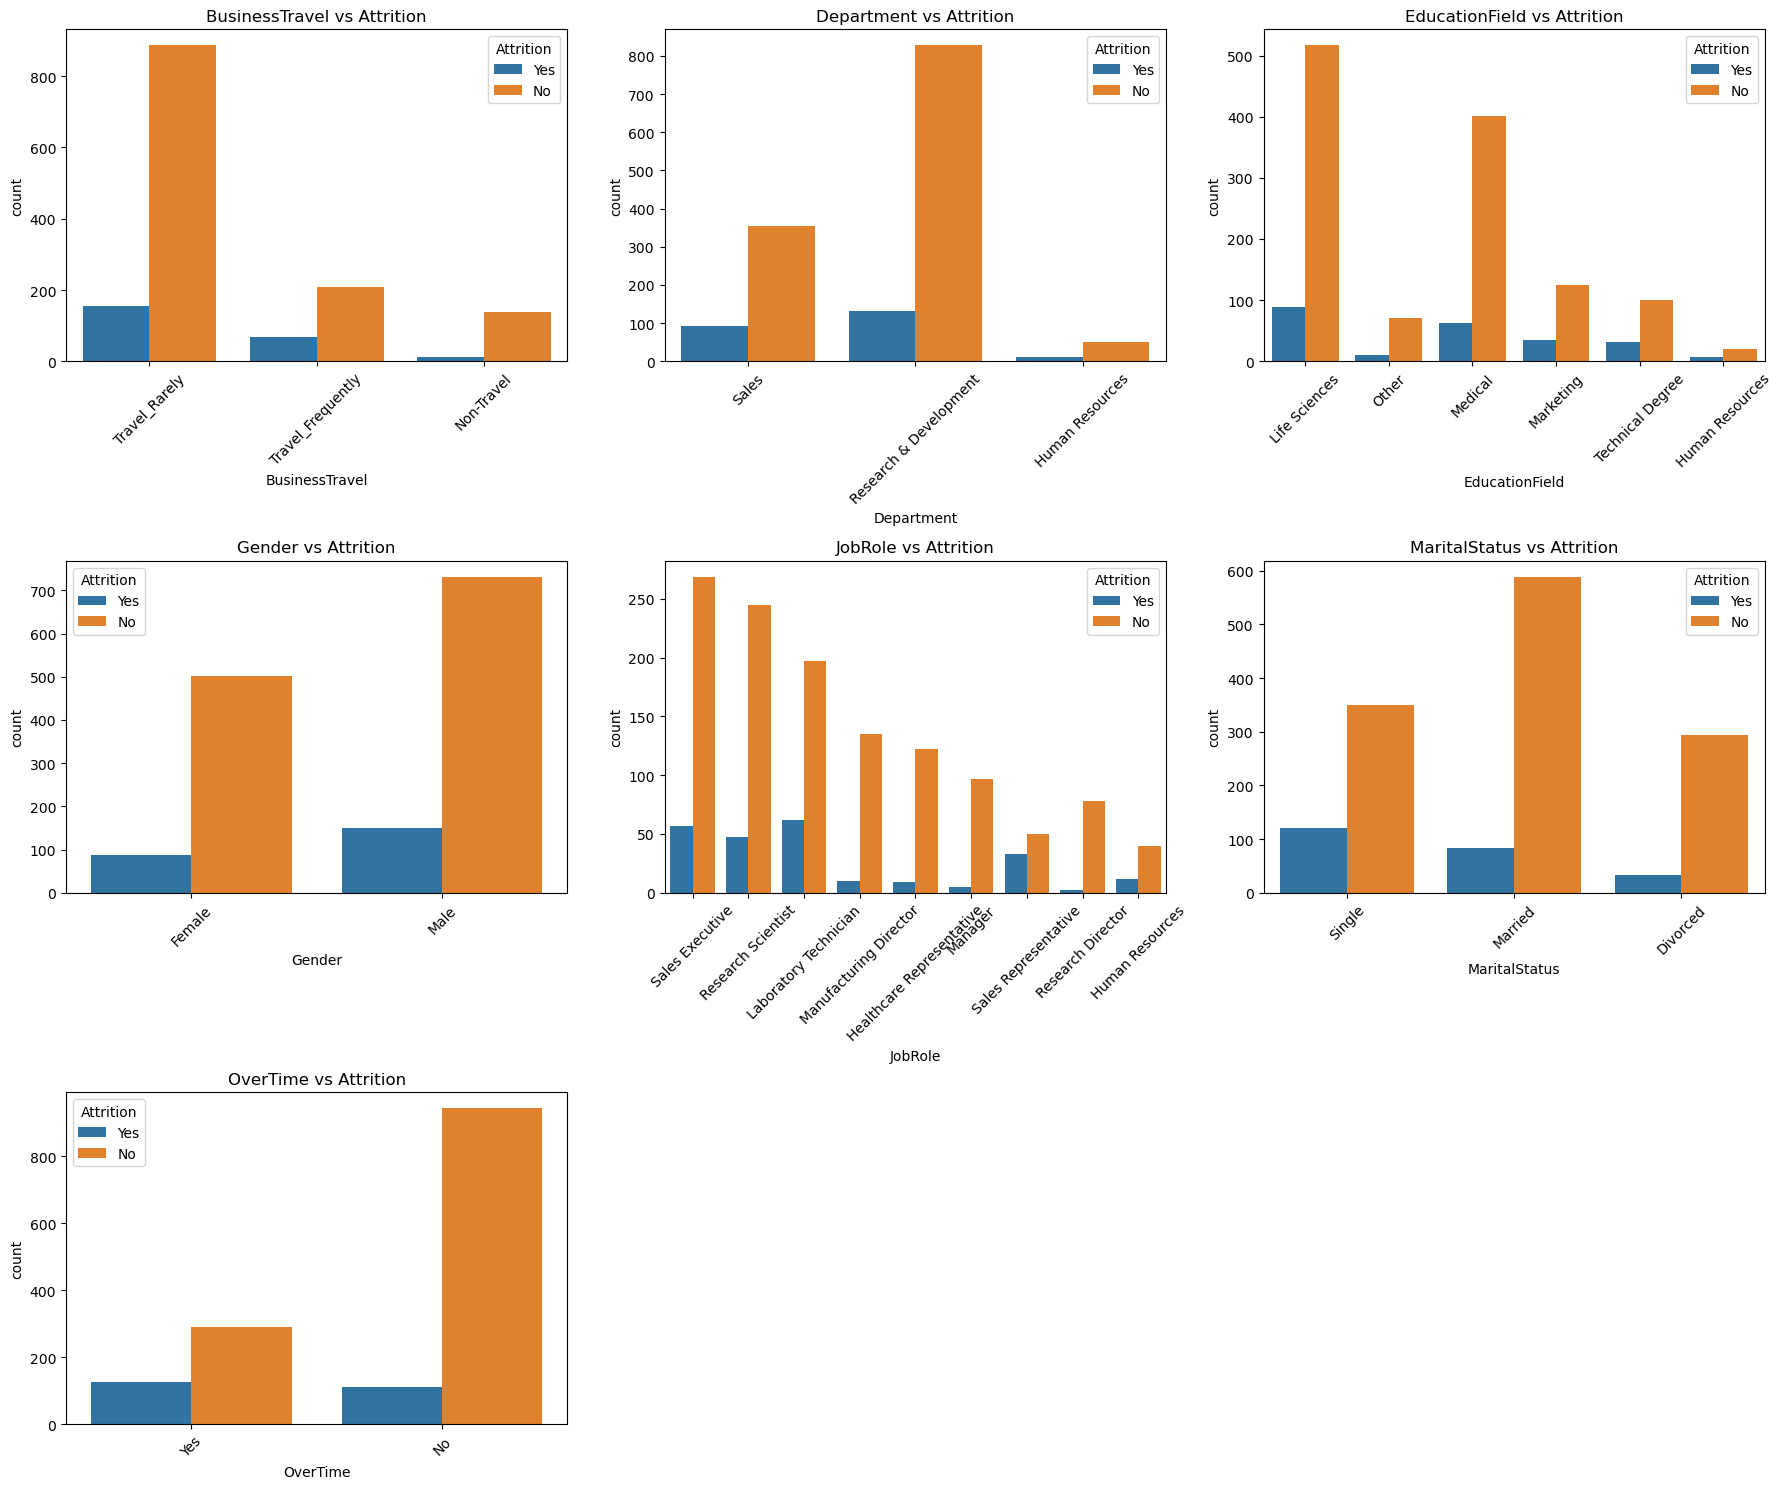

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math

# 범주형 컬럼 추출
cat_cols = [c for c, t in hr_df.dtypes if t == 'string' and c != 'Attrition']

# PySpark → Pandas 변환
pandas_df = hr_df.select(cat_cols + ['Attrition']).toPandas()

# 그리드 크기 설정
n_cols = 3
n_rows = math.ceil(len(cat_cols) / n_cols)

# 서브플롯 생성
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten()

# 각 서브플롯에 countplot
for i, col in enumerate(cat_cols):
    sns.countplot(data=pandas_df, x=col, hue='Attrition', ax=axes[i])
    axes[i].set_title(f"{col} vs Attrition")
    axes[i].tick_params(axis='x', rotation=45)

# 빈 subplot 제거
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

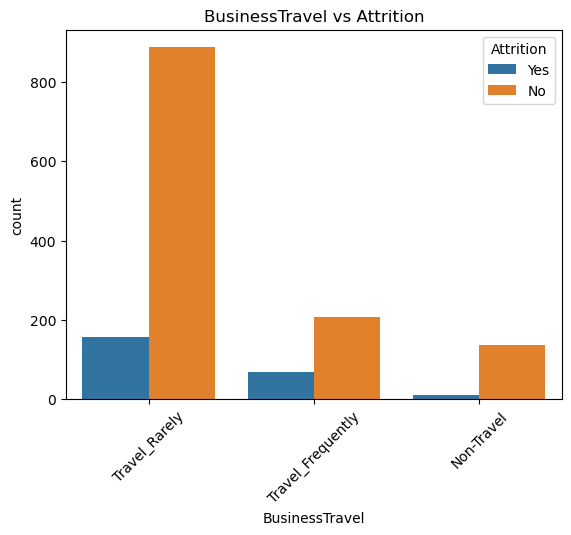

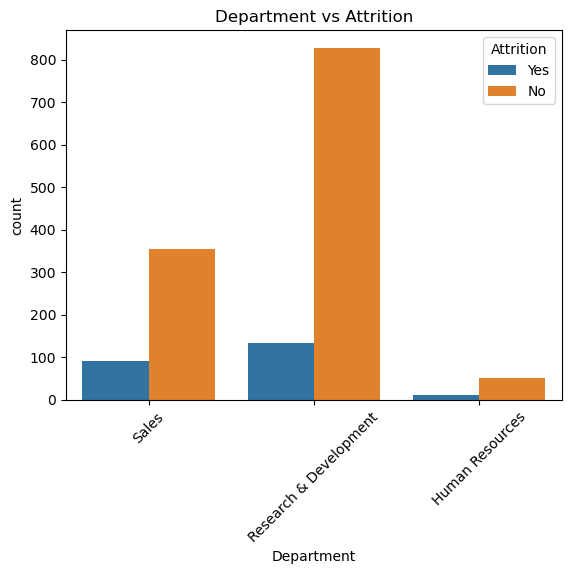

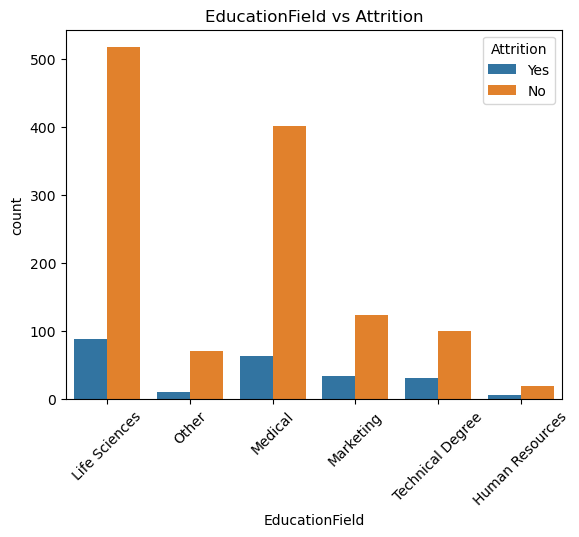

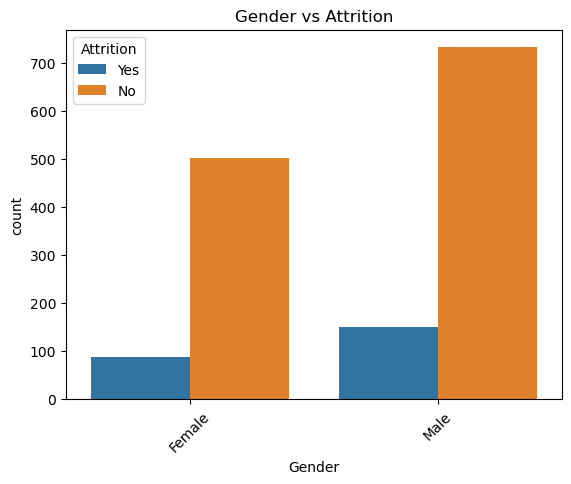

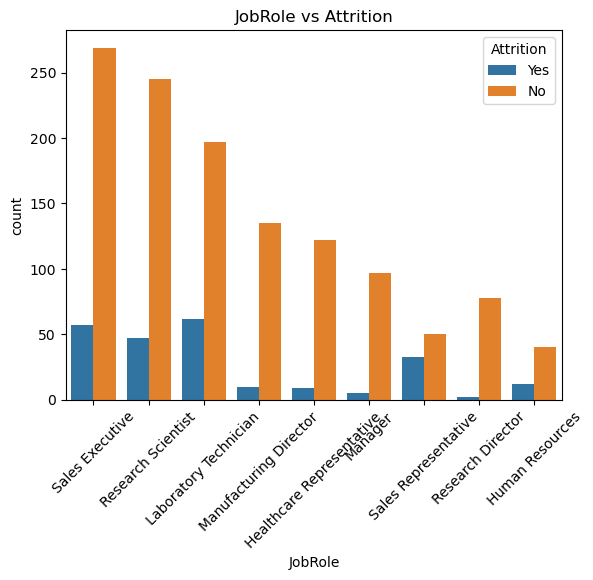

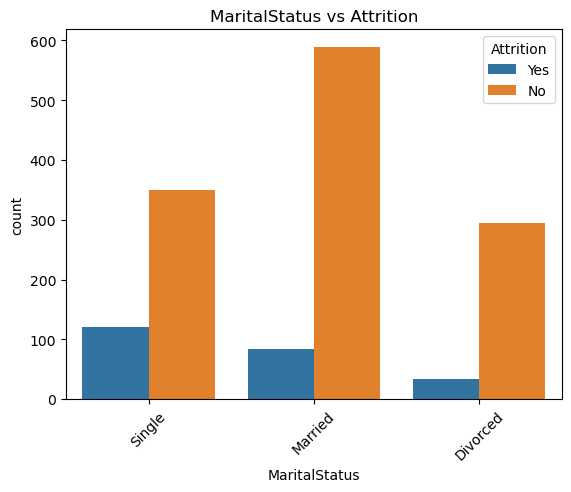

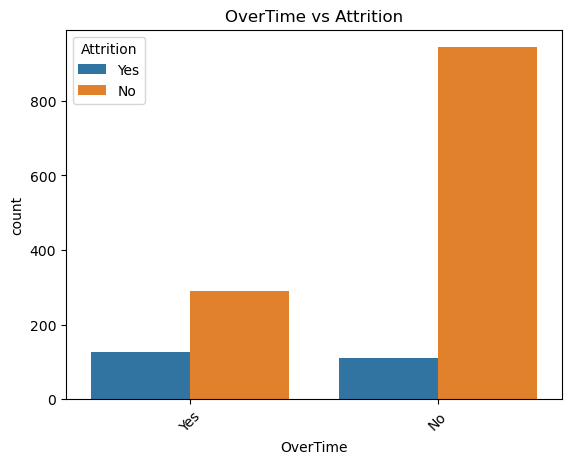

In [32]:
# 범주형 변수와 Attrition과의 상관관계 추출
cat_cols = [c for c, t in hr_df.dtypes if t == 'string' and c != 'Attrition']

for col in cat_cols:
    sns.countplot(data=pandas_df, x=col, hue='Attrition')
    plt.title(f"{col} vs Attrition")
    plt.xticks(rotation=45)
    plt.show()

In [33]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import (
    StringIndexer, OneHotEncoder, VectorAssembler, StandardScaler
)
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# 1. 선택한 feature 목록
cat_features_sel = ['OverTime', 'JobRole', 'MaritalStatus']
num_features_sel = [
    'Age', 'DistanceFromHome', 'JobSatisfaction',
    'EnvironmentSatisfaction', 'JobInvolvement'
]

# 2. label 인코더 (Attrition → label)
label_indexer = StringIndexer(inputCol='Attrition', outputCol='label')

# 3. 범주형 변수 처리
cat_stages_sel = []
for col in cat_features_sel:
    indexer = StringIndexer(inputCol=col, outputCol=col+'_idx').setHandleInvalid('keep')
    encoder = OneHotEncoder(inputCols=[col+'_idx'], outputCols=[col+'_onehot'])
    cat_stages_sel += [indexer, encoder]

# 4. 수치형 변수 정규화 처리
num_vector_stages_sel = []
for col in num_features_sel:
    assembler = VectorAssembler(inputCols=[col], outputCol=col+'_vec')
    scaler = StandardScaler(inputCol=col+'_vec', outputCol=col+'_scaled')
    num_vector_stages_sel += [assembler, scaler]

# 5. 최종 feature 벡터 생성
assembler_input_sel = [f"{c}_onehot" for c in cat_features_sel] + [f"{c}_scaled" for c in num_features_sel]
final_assembler_sel = VectorAssembler(inputCols=assembler_input_sel, outputCol='features')

# 6. 파이프라인 구성
stages_sel = [label_indexer] + cat_stages_sel + num_vector_stages_sel + [final_assembler_sel]
pipeline_sel = Pipeline(stages=stages_sel)

# 7. train/test 분할
train_df_sel, test_df_sel = hr_df.randomSplit([0.8, 0.2], seed=42)

# 8. 파이프라인 학습 및 데이터 변환
fitted_pipeline_sel = pipeline_sel.fit(train_df_sel)
vtrain_df_sel = fitted_pipeline_sel.transform(train_df_sel)
vtest_df_sel = fitted_pipeline_sel.transform(test_df_sel)

# 9. 로지스틱 회귀 모델 학습
lr_model_sel = LogisticRegression(featuresCol='features', labelCol='label')
model_sel = lr_model_sel.fit(vtrain_df_sel)

# 10. 예측 및 평가
pred_sel = model_sel.transform(vtest_df_sel)
pred_sel.select('label', 'prediction', 'probability').show(5)

# 11. 평가
evaluator = BinaryClassificationEvaluator()
auc = evaluator.evaluate(pred_sel)
print(f"선택 피처 기반 모델 AUC: {auc:.4f}")


+-----+----------+--------------------+
|label|prediction|         probability|
+-----+----------+--------------------+
|  0.0|       0.0|[0.79697877732576...|
|  1.0|       1.0|[0.13118257550747...|
|  0.0|       0.0|[0.55632208911067...|
|  1.0|       0.0|[0.72234493304690...|
|  0.0|       0.0|[0.54793728070612...|
+-----+----------+--------------------+
only showing top 5 rows

선택 피처 기반 모델 AUC: 0.7580


In [50]:
len(stages_sel)

18

In [34]:
import pandas as pd
import numpy as np

# 계수 추출 (DenseVector 형태 → numpy 배열)
coefficients = model_sel.coefficients.toArray()
feature_names = vtrain_df_sel.schema["features"].metadata["ml_attr"]["attrs"]

# One-hot feature 이름과 numeric feature 이름 추출
ordered_feature_names = []
for attr_type in ["binary", "numeric"]:
    if attr_type in feature_names:
        ordered_feature_names += [x['name'] for x in feature_names[attr_type]]

# 데이터프레임으로 정리
coef_df = pd.DataFrame({
    "feature": ordered_feature_names,
    "coefficient": coefficients
})
coef_df["abs_coef"] = coef_df["coefficient"].abs()

# 계수 절댓값 기준으로 정렬
coef_df_sorted = coef_df.sort_values("abs_coef", ascending=False)
coef_df_sorted.head(10)


,feature,coefficient,abs_coef
9,JobRole_onehot_Research Director,-19.166492,19.166492
8,JobRole_onehot_Sales Representative,2.524140,2.524140
10,JobRole_onehot_Human Resources,2.228924,2.228924
4,JobRole_onehot_Laboratory Technician,1.797660,1.797660
2,JobRole_onehot_Sales Executive,1.503281,1.503281
3,JobRole_onehot_Research Scientist,1.191144,1.191144
0,OverTime_onehot_No,-0.896879,0.896879
1,OverTime_onehot_Yes,0.896879,0.896879
12,MaritalStatus_onehot_Single,0.635547,0.635547
13,MaritalStatus_onehot_Divorced,-0.509206,0.509206


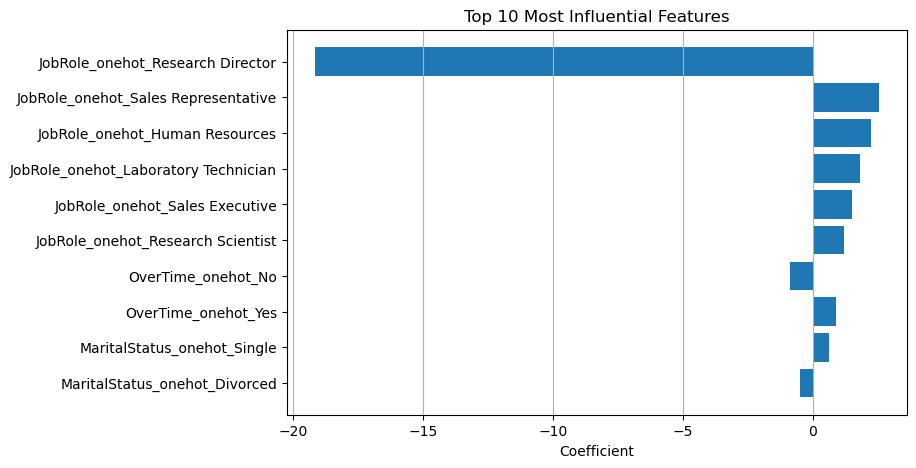

In [35]:
import matplotlib.pyplot as plt

top_n = 10
top_features = coef_df_sorted.head(top_n)

plt.figure(figsize=(8,5))
plt.barh(top_features['feature'], top_features['coefficient'])
plt.xlabel("Coefficient")
plt.title(f"Top {top_n} Most Influential Features")
plt.gca().invert_yaxis()
plt.grid(True, axis='x')
plt.show()

In [36]:
hr_df.groupBy("JobRole").count().show()

+--------------------+-----+
|             JobRole|count|
+--------------------+-----+
|     Sales Executive|  326|
|Manufacturing Dir...|  145|
|Laboratory Techni...|  259|
|Sales Representative|   83|
|Healthcare Repres...|  131|
|  Research Scientist|  292|
|             Manager|  102|
|   Research Director|   80|
|     Human Resources|   52|
+--------------------+-----+



In [38]:
hr_df.groupBy('JobRole', 'Attrition').count().orderBy('JobRole', 'Attrition').show(truncate=False)


+-------------------------+---------+-----+
|JobRole                  |Attrition|count|
+-------------------------+---------+-----+
|Healthcare Representative|No       |122  |
|Healthcare Representative|Yes      |9    |
|Human Resources          |No       |40   |
|Human Resources          |Yes      |12   |
|Laboratory Technician    |No       |197  |
|Laboratory Technician    |Yes      |62   |
|Manager                  |No       |97   |
|Manager                  |Yes      |5    |
|Manufacturing Director   |No       |135  |
|Manufacturing Director   |Yes      |10   |
|Research Director        |No       |78   |
|Research Director        |Yes      |2    |
|Research Scientist       |No       |245  |
|Research Scientist       |Yes      |47   |
|Sales Executive          |No       |269  |
|Sales Executive          |Yes      |57   |
|Sales Representative     |No       |50   |
|Sales Representative     |Yes      |33   |
+-------------------------+---------+-----+



In [41]:
from pyspark.sql.functions import col, count, when, round

# 전체 인원, 퇴사자 수, 퇴사율 계산
jobrole_attrition = (
    hr_df.groupBy("JobRole")
    .agg(
        count("*").alias("Total"),
        count(when(col("Attrition") == "Yes", True)).alias("Attrited"),
    )
    .withColumn("AttritionRate(%)", round((col("Attrited") / col("Total")) * 100, 2))
    .orderBy("AttritionRate(%)", ascending=False)
)

jobrole_attrition.show(truncate=False)

+-------------------------+-----+--------+----------------+
|JobRole                  |Total|Attrited|AttritionRate(%)|
+-------------------------+-----+--------+----------------+
|Sales Representative     |83   |33      |39.76           |
|Laboratory Technician    |259  |62      |23.94           |
|Human Resources          |52   |12      |23.08           |
|Sales Executive          |326  |57      |17.48           |
|Research Scientist       |292  |47      |16.1            |
|Manufacturing Director   |145  |10      |6.9             |
|Healthcare Representative|131  |9       |6.87            |
|Manager                  |102  |5       |4.9             |
|Research Director        |80   |2       |2.5             |
+-------------------------+-----+--------+----------------+



In [2]:
spark.stop()